In [5]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e6/b3/388ab967a387cc92926f70e97688dd9a7189b29a0773db815ffc5289e2b5/yfinance-0.2.31-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.31-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached peewee-3.17.0.tar.gz (2.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached yfinance-0.2.31-py2.py3-none-any.whl (65 kB)
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=8d60aadd533875d5ee5a8f53f52

# IMPORTING LIBRARIES

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [26]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [29]:
data.reset_index(inplace = True)

In [30]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


# PRE PROCESSING DATA
MOVING AVERAGE (to predict the next day data by analysing the previous data)

In [31]:
ma_100_days = data.Close.rolling(100).mean()

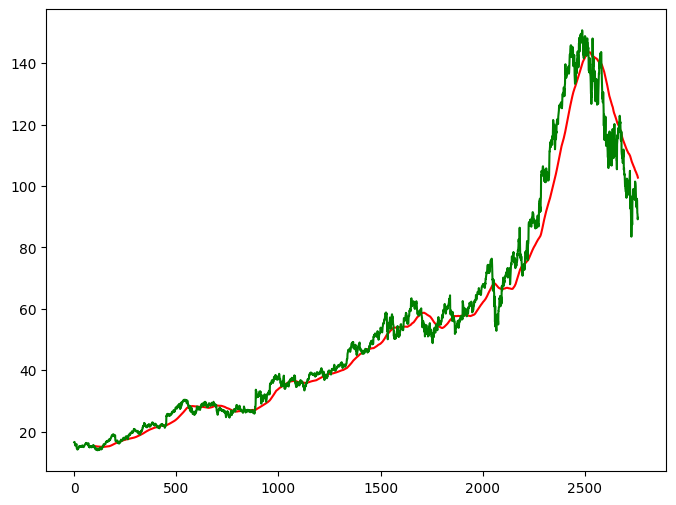

In [32]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [33]:
ma_200_days = data.Close.rolling(200).mean()

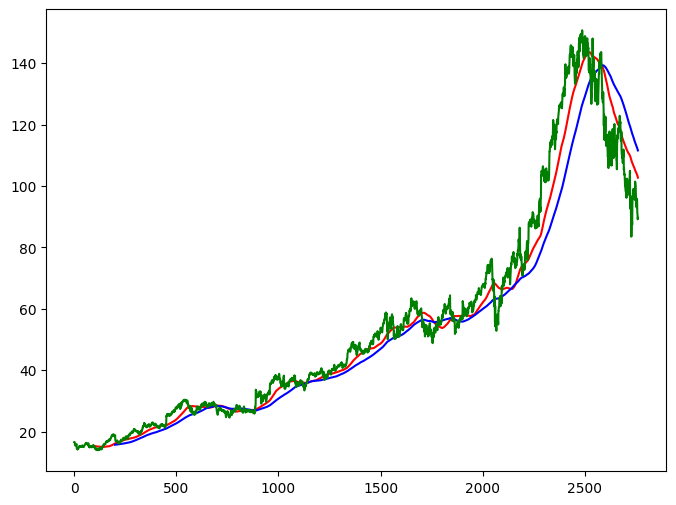

In [35]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [36]:
data.dropna(inplace = True)

In [40]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [41]:
data_train.shape[0]

2208

In [43]:
data_test.shape[0]

553

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [47]:
data_train_scale = scaler.fit_transform(data_train)

In [46]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i,0])

In [52]:
x, y = np.array(x), np.array(y)

# MODEL CREATION

In [50]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [54]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [55]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
66/66 [==============================] - 27s 262ms/step - loss: 0.0258
Epoch 2/50
66/66 [==============================] - 21s 314ms/step - loss: 0.0075
Epoch 3/50
66/66 [==============================] - 20s 298ms/step - loss: 0.0055
Epoch 4/50
66/66 [==============================] - 19s 283ms/step - loss: 0.0050
Epoch 5/50
66/66 [==============================] - 19s 289ms/step - loss: 0.0060
Epoch 6/50
66/66 [==============================] - 19s 285ms/step - loss: 0.0048
Epoch 7/50
66/66 [==============================] - 20s 300ms/step - loss: 0.0043
Epoch 8/50
66/66 [==============================] - 19s 284ms/step - loss: 0.0041
Epoch 9/50
66/66 [==============================] - 19s 285ms/step - loss: 0.0036
Epoch 10/50
66/66 [==============================] - 21s 313ms/step - loss: 0.0039
Epoch 11/50
66/66 [==============================] - 19s 283ms/step - loss: 0.0036
Epoch 12/50
66/66 [==============================] - 21s 322ms/step - loss: 0.0036
Epoch 13/50
6

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_2 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_3 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

# PREDICTING VALUES FROM MODEL

In [58]:
pas_100_days = data_train.tail(100)

In [59]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [63]:
data_test_scale = scaler.fit_transform(data_test)

In [64]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100: i])
    y.append(data_test_scale[i,0])

In [65]:
x, y = np.array(x), np.array(y)

In [71]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 86ms/step


In [74]:
scale = 1/scaler.scale_

In [75]:
y_predict = y_predict*scale

In [76]:
y = y*scale

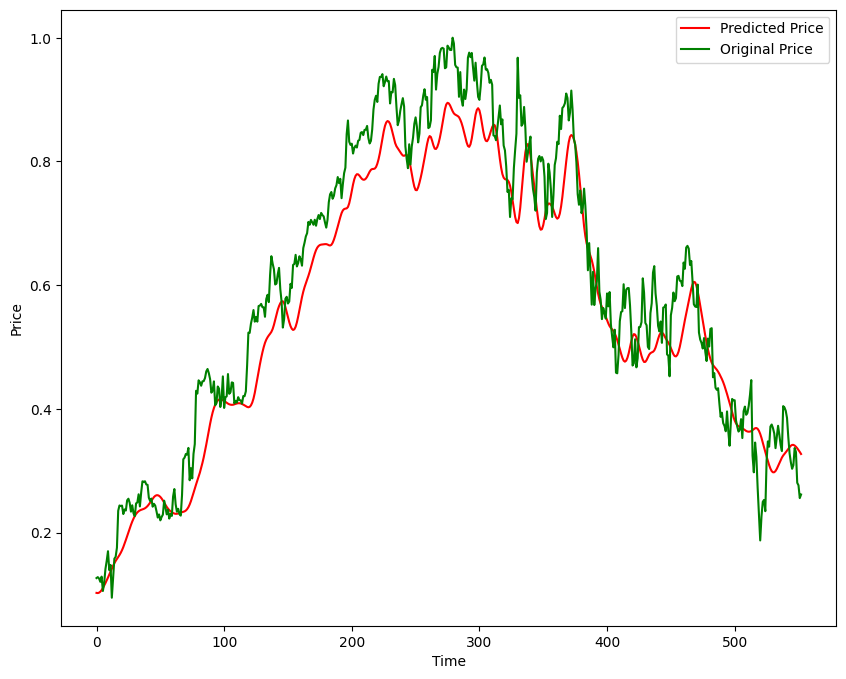

In [78]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [79]:
model.save('Stock Predicitions Model.keras')